## EE 502 P: Analytical Methods for Electrical Engineering
    
# Homework 6: Fourier Analysis
## Due 13 November, 2019 at 6:00 PM
### <span style="color: red">Kevin Egedy</span>

Copyright &copy; 2019, University of Washington

<hr>

**Instructions**: Use this notebook as a template. Answer all questions using well formatted Markdown with embedded LaTeX equations, executable Jupyter cells, or both. Submit your homework solutions as an `.ipynb` file via Canvas.

<span style="background: yellow; padding: 6px; border: 1pt solid black">
Although you may discuss the homework with others, you must turn in your own, original work.
</span>

**Things to remember:**
- Use complete sentences. Equations should appear in text as grammatical elements.
- Comment your code.
- Label your axes. Title your plots. Use legends where appropriate. 
- Before submitting a notebook, choose Kernel -> Restart and Run All to make sure your notebook runs when the cells are evaluated in order. 

Note : Late homework will be accepted up to one week after the due date and will be worth 50% of its full credit score. 

### 0. Warmup (Do not turn in)

- Make sure you get download, read, and run the notebook for lecture 4. Work through the notebook cell by cell and see what happens when you change the expressions, and make up some of your own.
- The material covered in class is intended to be an introductory overview of the incredibly rich and expansive subject of Fourier Analysis. 
- If you would like more resources, the following book is a good place to start. It is actually the notes used to teach intro signal processing at Stanford. Most of the material I covered in class is in these notes, plu a whole lot more.
> Osgood, [Lecture notes for EE 261](
https://see.stanford.edu/materials/lsoftaee261/book-fall-07.pdf).
- A more advanced and concise treatment of the subject is in the following book.
> Stein and Shakarchi, [Fourier Analysis: An Introduction](https://www.amazon.com/Fourier-Analysis-Introduction-Princeton-Lectures/dp/069111384X/ref=sr_1_1?keywords=stein+and+shakarchi+fourier&qid=1572974320&sr=8-1).

In [1]:
# Imports
import io
import requests
import math
import cmath
import pandas as pd
import numpy as np
import mpmath
import sympy as sp
sp.init_printing(use_latex='mathjax')
import scipy
import scipy.ndimage
import scipy.integrate as spi
import matplotlib.pyplot as plt
import matplotlib.patches as pch
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
#import warnings
#warnings.filterwarnings("ignore", module="matplotlib")

### 1. Exponential form of Complex Numbers

Express each of the following complex numbers in the form $r e^{i\theta}$. Do this by hand (or in Latex) and check your work with Python.

$$0$$
$$1$$
$$-1$$
$$i$$
$$1-2i$$
$$-8+7i$$

Complex number $0$ is equivalent to $ 0e^{i \theta}$.
<br><br>
Complex number $1$ is equivalent to $ 1e^{i 0}$.
<br><br>
Complex number $-1$ is equivalent to $ 1e^{-i \pi}$.
<br><br>
Complex number $i$ is equivalent to $ 1e^{i \pi/2}$.
<br><br>
Complex number $1-2i$ is equivalent to $ \sqrt{5}e^{-1.1071 i}$.
<br><br>
Complex number $-8+7i$ is equivalent to $ \sqrt{113}e^{2.4228i}$.

In [2]:
# Calculate by hand
# r = sp.sqrt(abs(a)**2+abs(b)**2)
# elif a<0
#     theta = round((sp.atan(b/a) + sp.pi).evalf(),4)
# else:
#     theta = round(sp.atan(b/a),4)

# magnitude functions: abs(-1+sm.I), sm.Abs(-1+sm.I)
# angle functions: sm.atan2(1,-1), sm.arg(-1+sm.I), np.angle(-1+1j), cmath.phase()


def complexPolar(x):
    '''
    Takes complex numbers and finds its polar equivalent such that (a+bi) = r*e^(i*theta)
    r*e^(i*theta) = r * (cos(theta) + i*sin(theta))
    '''
    return float(abs(x)),float(np.angle(x))

In [3]:
complexPolar(0)  # 0
complexPolar(1)  # 1
complexPolar(-1) # -1
complexPolar(1)  # i
complexPolar(1-2j) # 1-2i
complexPolar(-8+7j) # -8+7i

(0.0, 0.0)

(1.0, 0.0)

(1.0, 3.141592653589793)

(1.0, 0.0)

(2.23606797749979, -1.1071487177940904)

(10.63014581273465, 2.4227626539681686)

In [4]:
# Go from polar to complex number:  r * (cos(theta) + i*sin(theta))
def polarComplex(r,theta):
    return (r * (sp.cos(theta)+sp.sin(theta)*sp.I))

In [5]:
polarComplex(0,0)
polarComplex(1,0)
polarComplex(1,-sp.pi)
polarComplex(1,sp.pi/2)
polarComplex(math.sqrt(5),-1.1071)
polarComplex(math.sqrt(113),2.4228)

0

1

-1

ⅈ

1.00009743440143 - 1.99995127983251⋅ⅈ

-8.00026141664386 + 6.99970122686388⋅ⅈ

### 2. A Trigonometric Identity

The goal of this exercise is to find formulas for $\cos(\alpha+\beta)$ and $\sin(\alpha + \beta)$. in terms of $\sin\alpha$, $\sin\beta$, $\cos\alpha$, and $\cos\beta$.

a) First, express $e^{(\alpha+\beta)i}$ directly in terms of the $\sin$ and $\cos$ using Euler's formula.

b) Next, express $e^{(\alpha+\beta)i}$ as a product of two exponentials. Then convert each term in the product into $\sin$ and $\cos$ using Euler's formula. Expand the expression and group the terms in the real part and the imaginary part.

c) Equate the real parts and imaginary parts from (a) and (b).

We know $e^{(\theta)i} = \cos{(\theta)} + i \sin{(\theta)} $, so 
<br><br>
$$e^{(\alpha+\beta)i} = \cos{(\alpha+\beta)} + i \sin{(\alpha+\beta)} .$$

<hr>

$\begin{eqnarray}
e^{(\alpha+\beta)i} & = & e^{\alpha i}e^{\beta i} \\
& = & (\cos{\alpha} + i \sin{\alpha})(\cos{\beta} + i \sin{\beta}) \\
& = & \cos{\alpha}\cos{\beta} + i \cos{\alpha}\sin{\beta} + 
        i \sin{\alpha}\cos{\beta} + (i \sin{\alpha})(i \sin{\beta}) \\
& = & (\cos{\alpha}\cos{\beta} - \sin{\alpha}\sin{\beta}) + 
        i(\cos{\alpha}\sin{\beta} + \sin{\alpha}\cos{\beta}) \\
\end{eqnarray}$

<hr>

Using trigonometric identities: 
<br><br>
$\begin{eqnarray}
\cos{(A+B)} & = & \cos{A}\cos{B} - \sin{A}\sin{B} \\
\sin{(A+B)} & = & \sin{A}\cos{B} + \cos{A}\sin{B}
\end{eqnarray}$
<br><br>
Then

- $(\cos{\alpha}\cos{\beta} - \sin{\alpha}\sin{\beta}) + 
        i(\cos{\alpha}\sin{\beta} + \sin{\alpha}\cos{\beta})$
- $(\cos{\alpha}\cos{\beta} - \sin{\alpha}\sin{\beta}) + 
        i(\sin{\alpha}\cos{\beta} + \sin{\beta}\cos{\alpha})$
- $\cos{(\alpha+\beta)} + i \sin{(\alpha+\beta)}$

Thus $e^{(\alpha+\beta)i} = \cos{(\alpha+\beta)} + i \sin{(\alpha+\beta)}.$

### 3. Fourier Series Approximation

Similar to the example of the square wave done in class, find a Fourier Series approximation to the function

$$
f(t) = \left |cos(2\pi t) \right|
$$

which is a *rectified cosine*. Make sure you get the period of this function correct. Make a plot with three subplots for $N=5$, $N=10$, and $N=20$ showing better and better approximations.

<hr>

**Notes** Fourier Coefficients for $f$

$$
f(t) = \sum_{n=-\infty}^\infty c_n e^{2 \pi int / T}
$$

where 

$$
c_n = \frac{1}{T} \int_0^T e^{-2\pi int/T} f(t) dt .
$$

<hr>

In [6]:
t = sp.symbols("t", real=True)
n = sp.symbols("n", integer=True, positive=True)

# Fourier Series terms
def FSterms(f,T,N):
    '''
    Given function f with period T, 
    returns the Fourier Series for N approximations
    '''
    
    q = -sp.pi*n*t*1j/T # arguments of the exponential in the cn equation

    # Formula for the complex coefficients
    cn = (1 / T)*sp.integrate(f*sp.exp(q), (t,-T,T))
    
    vals = range(-math.ceil(N/2),math.ceil(N/2))
    terms = [cn.subs(n,k)*sp.exp(sp.pi*sp.I*k*t/T) for k in vals]
    rterms = [i for i in terms if i != sp.nan]
    
    return rterms

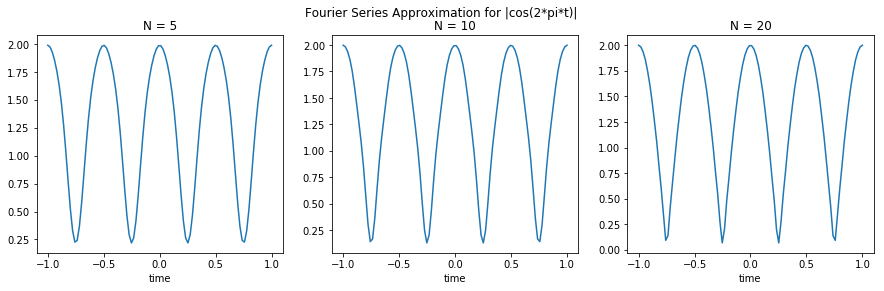

In [7]:
# Plot the sum of all the terms versus theta
nterms = [5,10,20]
x = np.linspace(-1,1,100)
fig,axs = plt.subplots(1,3,figsize=(15,4))

for i,N in enumerate(nterms):  
    # function
    f = sp.cos(2*sp.pi*t)
    T = sp.Rational(1,4)   # half period (since symmetric interval is used)
    
    # fourier series approximation
    terms = FSterms(f,T,N)
    fapprox = sp.re(sum(terms))
    fapprox = sp.lambdify((t,n),fapprox,'numpy')
    
    # plot
    axs[i].plot(x,fapprox(x,1))
    axs[i].set_xlabel('time')
    axs[i].set_title(f'N = {N}')

plt.suptitle('Fourier Series Approximation for |cos(2*pi*t)|')
plt.show();

### 4. Orthogonality

Show that $\cos(2\pi t)$ and $\sin(2 \pi t)$ are orthogonal by showing that their inner product (a.k.a. dot product) is zero. Hint: Express the two functions in exponential form, and expand their product inside the integral.

<hr>

**Notes**
Say that $f,g,h \in L^2[0,1]$. Then we can define something like a dot product, called the **inner product** by

$$
(f,g) = \int_0^1 f(t)\overline{g(t)} dt = 0.
$$

Then all of the above properties for real vectors also hold for these functions, In particular, 

- $(f,f) \geq 0$ and $(f,f) = 0$ implies $f = 0$.
- $(f,g)= (g,f)$
- $(af,g) = a(f,g)$
- $(f+g,h) = (f,h)+(g,h)$.

<hr>

In [8]:
# integrate or use trig identity
t = sp.symbols('t')
f = sp.cos(2*sp.pi*t)
g = sp.sin(2*sp.pi*t)
sp.integrate(f*g,(t,0,1))

0

$
\begin{eqnarray}
f & = & \cos{(2\pi t)} & = & \frac{1}{2}(e^{i2\pi t} + e^{-i2\pi t}) \\
g & = & \sin{(2\pi t)} & = & \frac{1}{2}(e^{-i2\pi t} - e^{i2\pi t}) \\
& & f \cdot g & = &\frac{1}{2}(e^{i2\pi t} + e^{-i2\pi t}) \frac{1}{2}(e^{-i2\pi t} - e^{i2\pi t}) \\
& & f \cdot g & = &\frac{1}{4}(e^{i2\pi t}e^{-i2\pi t} + e^{-i2\pi t}e^{-i2\pi t} - e^{i2\pi t}e^{i2\pi t} - e^{-i2\pi t}e^{i2\pi t}) \\
& & & = & \frac{1}{4}e^{-4 i \pi t} - e^{4 i \pi t} \\
& & \int_0^1 \frac{1}{4}e^{-4 i \pi t} - e^{4 i \pi t} dt & = & 0 
\end{eqnarray}
$

### 5. Fourier Transforms

Find the Fourier Transforms of the following functions. You can use `sympy`. Make sure to simplify, these shouldn't give complicated results. Plot original functions and their transforms in a nice 3 $\times$ 2 grid of plots. Label the sub plots.

$$
f(t) = \left \{ 
\begin{array}{l}
1 \;\mathrm{if} \;t \geq 0 \\
0 \;\mathrm{else}
\end{array}
\right .
$$

$$
f(t) = \frac{1}{1+t^2}
$$

$$
f(t) = e^{-\pi t^2}
$$

In [9]:
# function 1
t, s = sp.var("t s")

Ff1 = sp.integrate(sp.exp(-2*sp.pi*sp.I*s*t) * 0,(t,-sp.oo, 0)) + \
        sp.integrate(sp.exp(-2*sp.pi*sp.I*s*t) * 1,(t,0, sp.oo))

Ff1.simplify()

⎧      -ⅈ              π   │         π│
⎪     ─────        for ─ > │arg(s) + ─│
⎪     2⋅π⋅s            2   │         2│
⎪                                      
⎪∞                                     
⎨⌠                                     
⎪⎮  -2⋅ⅈ⋅π⋅s⋅t                         
⎪⎮ ℯ           dt       otherwise      
⎪⌡                                     
⎪0                                     
⎩                                      

In [10]:
# function 2
f2 = 1/(1+t**2)
Ff2 = sp.integrate(sp.exp(-2*sp.pi*sp.I*s*t) * f2,(t,-sp.oo, sp.oo))
Ff2.simplify()

⎧       -2⋅π⋅s               
⎪    π⋅ℯ            for s > 0
⎪                            
⎪∞                           
⎪⌠                           
⎪⎮   -2⋅ⅈ⋅π⋅s⋅t              
⎨⎮  ℯ                        
⎪⎮  ─────────── dt  otherwise
⎪⎮      2                    
⎪⎮     t  + 1                
⎪⌡                           
⎪-∞                          
⎩                            

In [11]:
# function 3
f3 = sp.exp(-sp.pi*t**2)
Ff3 = sp.integrate(sp.exp(-2*sp.pi*sp.I*s*t) *f3,(t,-sp.oo, sp.oo))
Ff3.simplify()

     2
 -π⋅s 
ℯ     

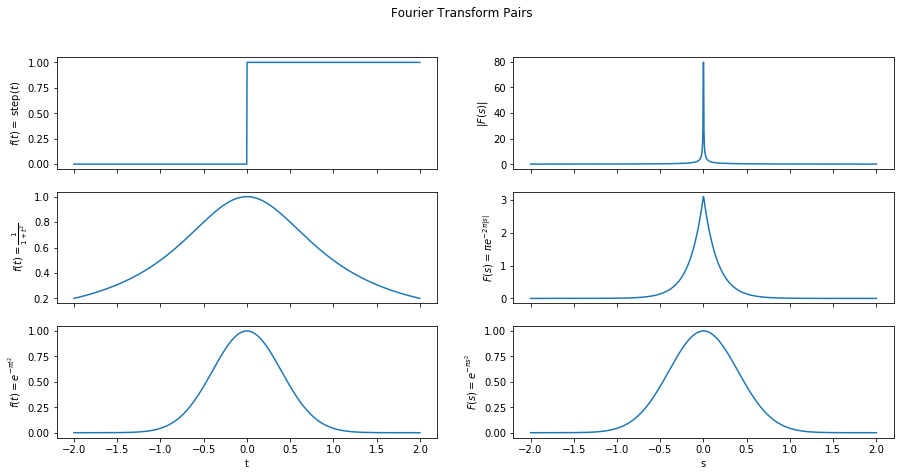

In [12]:
s = np.linspace(-2,2,1000)
t = s

# The f(t) functions
fta = lambda t: np.where(t>=0, 1, 0)  
ftb = lambda t: 1/(1+t**2)          #f2
ftc = lambda t: np.exp(-np.pi*t**2) #f3

# The Fourier Transforms
FTa = abs(1 / (2*np.pi*s*1j)) # Can't plot Argand Diagram along with these so let's just do magnitude 
FTb = np.pi*np.exp(-2*np.pi*np.abs(s))
FTc = abs(np.exp(-np.pi*s**2))

# Begin plotting
fig,ax=plt.subplots(3,2,sharex=True,figsize=(15,7))

ax[0,0].plot(t, fta(t)); ax[0,0].set_ylabel(r"$f(t) =$ step$(t)$")
ax[0,1].plot(s, FTa); ax[0,1].set_ylabel(r"$|F(s)|$")

ax[1,0].plot(t, ftb(t)); ax[1,0].set_ylabel(r"$f(t)=\frac{1}{1+t^2}$")
ax[1,1].plot(s, FTb); ax[1,1].set_ylabel(r"$F(s)=\pi e^{-2\pi |s|}$")

ax[2,0].plot(t, ftc(t)); ax[2,0].set_ylabel(r"$f(t)=e^{-\pi t^2}$"); ax[2,0].set_xlabel('t');
ax[2,1].plot(s, FTc); ax[2,1].set_ylabel(r"$F(s)=e^{-\pi s^2}$"); ax[2,1].set_xlabel('s');

plt.suptitle('Fourier Transform Pairs')
plt.show();

### 6. Solve a system of ODEs

Similar to the ODE example in the notes, find a solution to the two differential equations

\begin{eqnarray}
\dot x & = & -y \\
\dot y & = & -x + u
\end{eqnarray}

a) First take the Fourier Transform of both equations. 

b) Solve for $Y(s)$ in terms of $U(s)$. 

c) Note that the solution for $Y(s)$ involves a function of $s$ times $U(s)$. Figure out the inverse Fourier Transform of that function. 

d) Use a convolution to figure out $y(t)$ in terms of $u(t)$. 

e) Find $X(s)$ in terms of $Y(s)$ and then $x(t)$ in terms of $y(t)$. 

<hr>

**Fourier transform:**

$$
\mathcal{F}f(s) = \int_{-\infty}^\infty e^{-2 \pi i s t} f(t) dt.
$$

<hr>

**Inverse Fourier transform**

$$
\mathcal{F}^{-1}g(t) = \int_{-\infty}^\infty  e^{2 \pi ist} g(s) ds.
$$

<hr>

If you transform a function and then un-transform it, you should get it back. That is

$$\mathcal{F}^{-1}\mathcal{F}f = f$$

<hr>

Derivative Example:

$$
f'(t)
\stackrel{\mathcal{F}}{\longrightarrow}
2 \pi is F (s) .
$$

<hr>

$
\begin{eqnarray}
\dot x & = & -y     &   & 2\pi i s X(s) & = & -Y(s)\\
\dot y & = & -x + u &   & 2\pi i s Y(s) & = & X(s) + U(s)
\end{eqnarray}
$
<hr>

Observe 
<br>
$\begin{eqnarray}
X(s) = -2\pi i s Y(s) + U(s)
\end{eqnarray}$
<br><br>
Solve for Y(s)
<br>
$\begin{eqnarray}
Y(s) & = & {-2\pi i s} X(s) \\
Y(s) & = & {-2\pi i s} [{-2\pi i s} Y(s) + U(s)] \\
Y(s) & = & {(2\pi i s)}^2 Y(s) - {2\pi i s} U(s) \\
Y(s) - {(2\pi i s)}^2 Y(s) & = & - {2\pi i s} U(s) \\
Y(s) & = & [\frac{- 2\pi i s}{1-(2\pi i s)^2}]U(s)
\end{eqnarray}$

<hr>

$\begin{eqnarray}
Y(s) & = & [\frac{- 2\pi i s}{1-(2\pi i s)^2}]U(s) \\
     &   & \\
     & = & [\frac{- 2\pi i s}{1+(2\pi s)^2}] U(s) 
\end{eqnarray}$
<br><br>
Then
<br>
$\begin{eqnarray}
y(t) = -u(t)' e^{-|t|}
\end{eqnarray}$

<hr>

In [13]:
t, s = sp.symbols("t,s")
FT = sp.exp(-t)
# let u = 1
f = sp.integrate(sp.exp(-1j*2*sp.pi*s*t)*FT, (s,0,sp.oo))
f.simplify()

⎧              -t                              
⎪      -0.5⋅ⅈ⋅ℯ                π   │         π│
⎪      ───────────         for ─ > │arg(t) + ─│
⎪          π⋅t                 2   │         2│
⎪                                              
⎨∞                                             
⎪⌠                                             
⎪⎮  t⋅(-2.0⋅ⅈ⋅π⋅s - 1)                         
⎪⎮ ℯ                   ds       otherwise      
⎪⌡                                             
⎩0                                             

<hr>

$\begin{eqnarray}
X(s) = -2\pi i s Y(s) + U(s)
\end{eqnarray}$
<br><br>
$\begin{eqnarray}
x(t) & = & -y(t)' + u(t) \\
     & = & -[ -u(t)'' e^{-t} + u(t)'e^{-t} ] + u(t) \\
     & = & u(t)'' e^{-t} - u(t)'e^{-t}) + u(t)
\end{eqnarray}$

### 7. The DFT

a) Write a python function that takes an integer $N$ and returns a `sympy` matrix representing the DFT matrix $\mathbf{F}$ as defined in the notes. 

b) Define $\mathbf{U} = \frac{1}{\sqrt{N}}\mathbf{F}$. Find the eigenvalues of $\mathbf{U}$ for various values of $N$. What do you notice? Is there a pattern?

c) Make a random sequence of $20$ real numbers between 0 and 1. Find the DFT using your matrix and compare it to the DFT you get using `numpy`'s built in function. Hint: you should convert your $\mathbf{F}$ matrix into a `numpy` matrix first. Plot your sequence, the magnitude of the DFT and the angle of the DFT.

<hr>

**Notes** The Discrete Fourier Transform of $x$ is defined by $\mathbf{X} \in \mathbb{C}^n$ with

$$
X_m = \sum_{k=0}^{n-1} x_n e^{-2 \pi i \frac{mk}{n}}.
$$

Here, $n$ is taking the place of time and $m$ is taking the place of $s$ in the continuous version of the transform.

The inverse transform is 

$$
X_m = \frac{1}{n}\sum_{k=0}^{n-1} x_n e^{2 \pi i \frac{mk}{n}}.
$$

Interestingly, if you look at the exponential terms, you see the various $n$th roots of unity. Let's denote 

$$
\omega_n = e^{-2 \pi i / n }
$$

<hr>

In fact, defining

$$
\mathbf{F} = \begin{pmatrix}
\omega_n^{0\cdot 0} & \dots & \omega_n^{0\cdot (n-1)} \\
\vdots & & \vdots \\
\omega_n^{(n-1)\cdot 0} & \dots & \omega_n^{(n-1)\cdot (n-1)}
\end{pmatrix} , 
\mathbf{x} = \begin{pmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n
\end{pmatrix}
$$

we get that

$$
\mathbf{X} = \mathbf{F}\mathbf{x}
$$

and

$$
\mathbf{x} = \mathbf{F}^{-1}\mathbf{X}.
$$

<hr>

In [14]:
def myDFT(N):
    '''Returns DFT matrix F'''
    x = sp.symbols('x')
    wn = sp.exp(-2*sp.pi*sp.I / N)
    F = np.empty((N,N))
    F = sp.Matrix(F)
    for i in range (0,N):
        for j in range(0,N):
            F[i,j] = wn**(i*j)
    return F

In [15]:
for N in range(0,5):
    U = (1/sp.sqrt(N) * myDFT(N))
    print(list(U.eigenvals().keys()))

[]
[1]
[-1, 1]
[sqrt(3)/9 - 2*(-1)**(1/3)*sqrt(3)/9 - (-9*(-1)**(2/3)*sqrt(3)/2 - 3*(-1)**(1/3)*sqrt(3) + 3*sqrt(3)*exp(10*I*pi/3)/2 + (-sqrt(3)/3 + 2*(-1)**(1/3)*sqrt(3)/3)**3 - (-3*sqrt(3) + 6*(-1)**(1/3)*sqrt(3))*(-2/3 - (-1)**(1/3)/3 + (-1)**(2/3)/3)/2 + sqrt((-9*(-1)**(2/3)*sqrt(3) - 6*(-1)**(1/3)*sqrt(3) + 3*sqrt(3)*exp(10*I*pi/3) + 2*(-sqrt(3)/3 + 2*(-1)**(1/3)*sqrt(3)/3)**3 - (-3*sqrt(3) + 6*(-1)**(1/3)*sqrt(3))*(-2/3 - (-1)**(1/3)/3 + (-1)**(2/3)/3))**2 - 4*(2 - (-1)**(2/3) + (-sqrt(3)/3 + 2*(-1)**(1/3)*sqrt(3)/3)**2 + (-1)**(1/3))**3)/2)**(1/3)/3 - (2 - (-1)**(2/3) + (-sqrt(3)/3 + 2*(-1)**(1/3)*sqrt(3)/3)**2 + (-1)**(1/3))/(3*(-9*(-1)**(2/3)*sqrt(3)/2 - 3*(-1)**(1/3)*sqrt(3) + 3*sqrt(3)*exp(10*I*pi/3)/2 + (-sqrt(3)/3 + 2*(-1)**(1/3)*sqrt(3)/3)**3 - (-3*sqrt(3) + 6*(-1)**(1/3)*sqrt(3))*(-2/3 - (-1)**(1/3)/3 + (-1)**(2/3)/3)/2 + sqrt((-9*(-1)**(2/3)*sqrt(3) - 6*(-1)**(1/3)*sqrt(3) + 3*sqrt(3)*exp(10*I*pi/3) + 2*(-sqrt(3)/3 + 2*(-1)**(1/3)*sqrt(3)/3)**3 - (-3*sqrt(3) + 6*(-1)**(

http://users.metu.edu.tr/ccandan/pub_dir/Eig_Structure_DFT_IEEE_SPM_Column_March2011.pdf

There is a pattern to the eigenvalues of the DFT matrix.  We can observe that the eigenvalues must follow $\lambda_k^N = 1$, where $N$ is the size of the DFT.

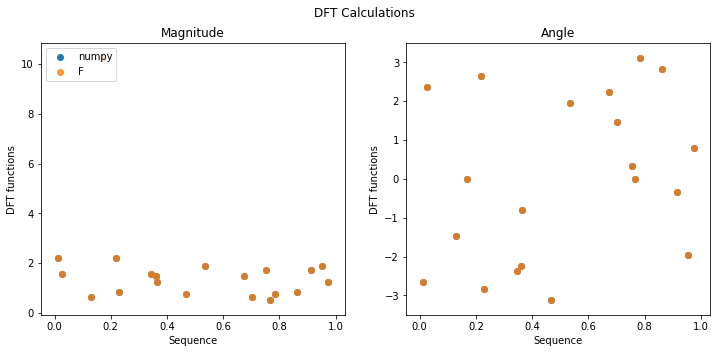

In [16]:
# https://stackoverflow.com/questions/17069864/what-is-the-best-way-to-convert-a-sympy-matrix-to-a-numpy-array-matrix
N = 20 
seq = np.random.rand(N).transpose()
F = np.empty((N,N),dtype=np.complex_)
for i,k in enumerate(myDFT(N)):
    F[i//N%N,i%N] = k.evalf()

fig,ax = plt.subplots(1,2,figsize=(12,5))
ax[0].scatter(seq,abs(np.fft.fft(seq)),label='numpy')
ax[0].scatter(seq,abs(np.dot(F,seq)),alpha=0.8,label='F')
ax[0].set_title('Magnitude')
ax[0].set_xlabel('Sequence')
ax[0].set_ylabel('DFT functions')
ax[1].scatter(seq,np.angle(np.fft.fft(seq)),label='numpy')
ax[1].scatter(seq,np.angle(np.dot(F,seq)),alpha=0.8,label='F')
ax[1].set_title('Angle')
ax[1].set_xlabel('Sequence')
ax[1].set_ylabel('DFT functions')
ax[0].legend(loc='upper left')
plt.suptitle('DFT Calculations')
plt.show();

### 8. Filtering

Repeat the example from the notes on filtering the sum of two sine waves, except do the sum of a sine wave plus zero centered Gaussian noise with variance 0.25. Note, to make a list of numbers random Gaussian numbers, use the function `np.random.normal`. In the notes, a cutoff of 10 was used. Tune this to try to recover the sine wave as best you can in the low pass filtered version.

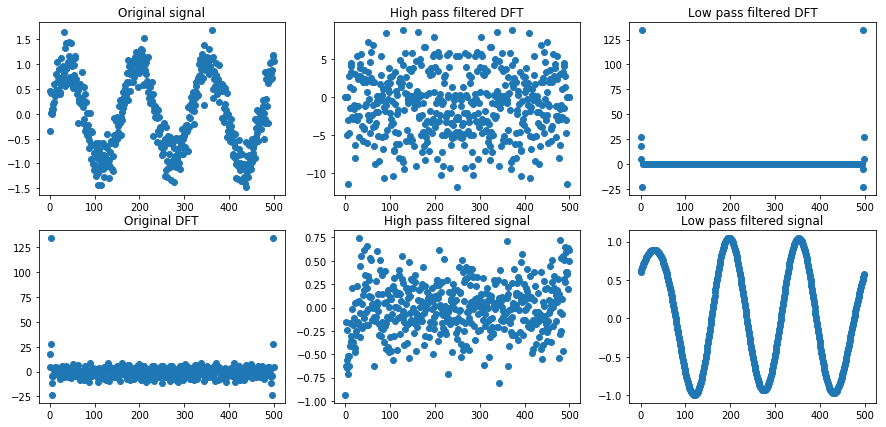

In [17]:
# Filters

# Settings
n = 500
mu = 0
sigma = 0.25
cutoff = 5

# Signal
x_signal = np.sin(np.linspace(0,20,n))
x_noise = np.random.normal(mu, sigma, n)
x = x_signal + x_noise
X = np.fft.fft(x)

HPF = np.copy(X)
HPF[0:cutoff] = 0 # remove low frequencies
HPF[-cutoff:n] = 0
xhpf = np.real(np.fft.ifft(HPF))

LPF = np.copy(X)
LPF[cutoff:n-cutoff] = 0 # remove high frequencies
xlpf = np.real(np.fft.ifft(LPF))

fig,ax=plt.subplots(2,3,figsize=(15,7))

ax[0,0].plot(x,'o'); ax[0,0].set_title("Original signal")
ax[1,0].plot(np.real(X),'o'); ax[1,0].set_title("Original DFT")

ax[0,1].plot(np.real(HPF),'o'); ax[0,1].set_title("High pass filtered DFT")
ax[1,1].plot(xhpf,'o'); ax[1,1].set_title("High pass filtered signal")

ax[0,2].plot(np.real(LPF),'o'); ax[0,2].set_title("Low pass filtered DFT")
ax[1,2].plot(xlpf,'o'); ax[1,2].set_title("Low pass filtered signal")

plt.show();

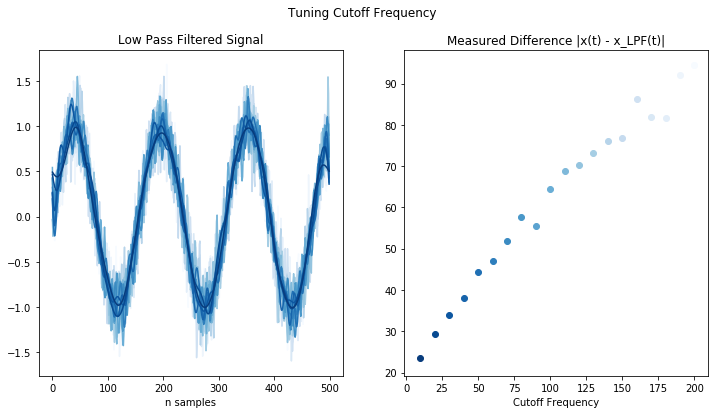

In [18]:
fig,ax=plt.subplots(1,2,figsize=(12,6))

Bcolors = plt.cm.Blues(np.linspace(0,1,21))
for i,num in enumerate(range(200,0,-10)):
    #Settings
    n = 500
    mu = 0
    sigma = 0.25
    cutoff = num

    # Signal
    x_signal = np.sin(np.linspace(0,20,n))
    x_noise = np.random.normal(mu, sigma, n)
    x = x_signal + x_noise
    X = np.fft.fft(x)
    
    # Cutoff
    LPF = np.copy(X)
    LPF[cutoff:n-cutoff] = 0 # remove high frequencies
    xlpf = np.real(np.fft.ifft(LPF))
    
    # Diff
    s = 0
    for j in range(len(x_signal)):
        s += np.abs(x_signal[j]-xlpf[j])
    
    ax[0].plot(xlpf,color=Bcolors[i])
    ax[1].scatter(num,s,color=Bcolors[i])

ax[0].set_xlabel('n samples')
ax[0].set_title('Low Pass Filtered Signal')
ax[1].set_xlabel('Cutoff Frequency')
ax[1].set_title('Measured Difference |x(t) - x_LPF(t)|')
plt.suptitle('Tuning Cutoff Frequency')
plt.show();

### 9.  Image Processing

Find a nice gray scale image to load, or use the Minion image from class. Call the resulting matrix $m$.

a) Render the image using `matplotlib`. 

b) Take the DFT of the image $m$ to get a matrix $M$. Then make a new matrix $M_\mathrm{new}$ in which each entry is just the magnitude of the corresponding entry in $M$. Create a new image from the inverse Fourier transform of this image and render it. 

c) Do the same thing, except set the entries in $M_\mathrm{new}$ to the angle of the entries in $M$. Create a new image from the inverse Fourier transform of this image and render it.

d) Do the same thing, except normalize all the entries in $M_\mathrm{new}$ to have magnitude 1. Create a new image from the inverse Fourier transform of this image and render it.

What might you conclude about the information contained in the magnitude of the transformed image? What might you conclude about the information contained in the angle?

**Extra Credit:** Do this exercise with a color image instead of gray scale.

In [19]:
# download image
!wget -cO - https://cjmart.jp/en/upload/save_image/0132_190824_mp4otl_y_3.jpg > minion.jpg

--2019-11-13 16:41:57--  https://cjmart.jp/en/upload/save_image/0132_190824_mp4otl_y_3.jpg
Resolving cjmart.jp (cjmart.jp)... 133.242.84.88
Connecting to cjmart.jp (cjmart.jp)|133.242.84.88|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64114 (63K) [image/jpeg]
Saving to: ‘STDOUT’

-                   100%[===================>]  62.61K   149KB/s    in 0.4s    

2019-11-13 16:41:59 (149 KB/s) - written to stdout [64114/64114]



In [20]:
# read image
m = plt.imread('minion.jpg')
m.shape

(600, 600, 3)

In [21]:
# https://stackoverflow.com/questions/12201577/how-can-i-convert-an-rgb-image-into-grayscale-in-python
m = np.dot(m, [0.2989, 0.5870, 0.1140])

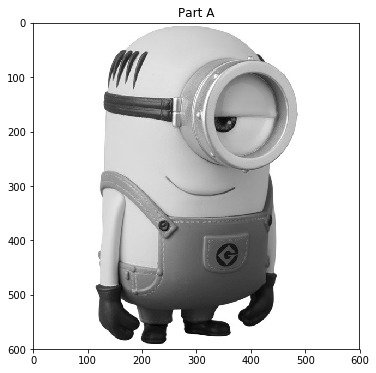

In [22]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(m, cmap = 'gray')
ax.set_title('Part A')
plt.show();

In [23]:
# Magnitude
M = np.fft.fft2(m)
#M = np.fft.fftshift(M) # Shift it so the low frequencies are in the middle
Mnew = 20*np.log(np.abs(M))

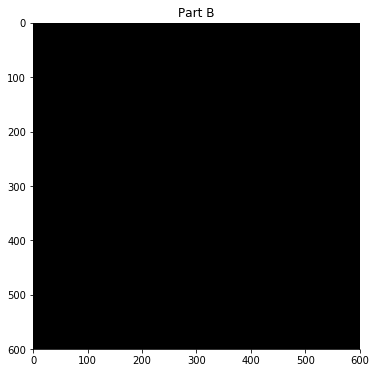

In [24]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(np.abs(np.fft.ifft2(Mnew)), cmap = 'gray')
ax.set_title('Part B')
plt.show();

In [25]:
# Phase
Mnew = np.angle(M)

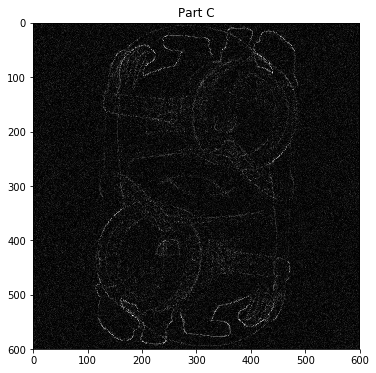

In [26]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(np.abs(np.fft.ifft2(Mnew)), cmap = 'gray')
ax.set_title('Part C')
plt.show();

In [27]:
# Normalize to magnitude 1
# https://chrisalbon.com/machine_learning/vectors_matrices_and_arrays/apply_operations_to_elements/
norm = lambda m: 0 if m == 0 else m/np.abs(m)
vectorized_norm = np.vectorize(norm)
Mnew = vectorized_norm(M)

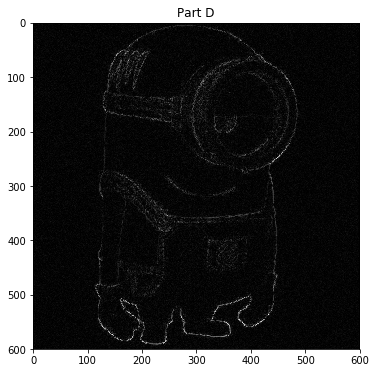

In [28]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(np.abs(np.fft.ifft2(Mnew)), cmap = 'gray')
ax.set_title('Part D')
plt.show();

In my observation, the angle contains all the important information of the original image.

In [29]:
# Extra Credit
m = plt.imread('minion.jpg')
m.shape

(600, 600, 3)

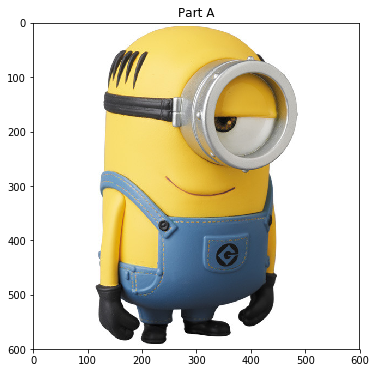

In [30]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(m)
ax.set_title('Part A')
plt.show();

In [31]:
# Magnitude
M = np.fft.fft2(m)
#M = np.fft.fftshift(M) # Shift it so the low frequencies are in the middle
Mnew = 20*np.log(np.abs(M))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


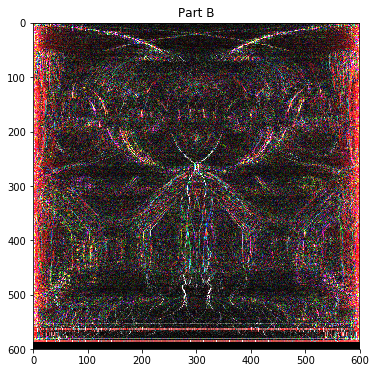

In [32]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(np.abs(np.fft.ifft2(Mnew)), cmap = 'gray')
ax.set_title('Part B')
plt.show();

In [33]:
# Phase
Mnew = np.angle(M)

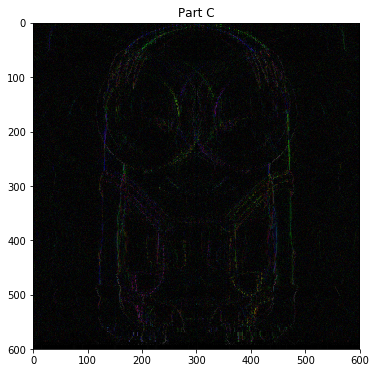

In [34]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(np.abs(np.fft.ifft2(Mnew)), cmap = 'gray')
ax.set_title('Part C')
plt.show();

In [35]:
# Normalize to magnitude 1
# https://chrisalbon.com/machine_learning/vectors_matrices_and_arrays/apply_operations_to_elements/
norm = lambda m: 0 if m == 0 else m/np.abs(m)
vectorized_norm = np.vectorize(norm)
Mnew = vectorized_norm(M)

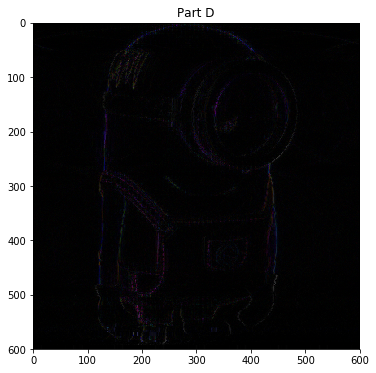

In [36]:
fig, ax = plt.subplots(figsize=(6,6))
ax.imshow(np.abs(np.fft.ifft2(Mnew)), cmap = 'gray')
ax.set_title('Part D')
plt.show();